In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyndamics3 import Simulation
from sci378 import *

pyndamics3  version  0.0.29
Version:  0.0.18


In [4]:
data=pd.read_excel('Mobile telephone service.xlsx')
data

,Year,Americans with Cellular Service (%)
0,1995,12.690
1,1996,16.350
2,1997,20.290
3,1998,25.080
4,1999,30.810
5,2000,38.750
6,2001,45.000
7,2002,49.160
8,2003,55.150
9,2004,62.852


In [9]:
t=data['Year']
x=data['Americans with Cellular Service (%)']
t=t-min(t)  # this data doesn't start at t=0, so adjust

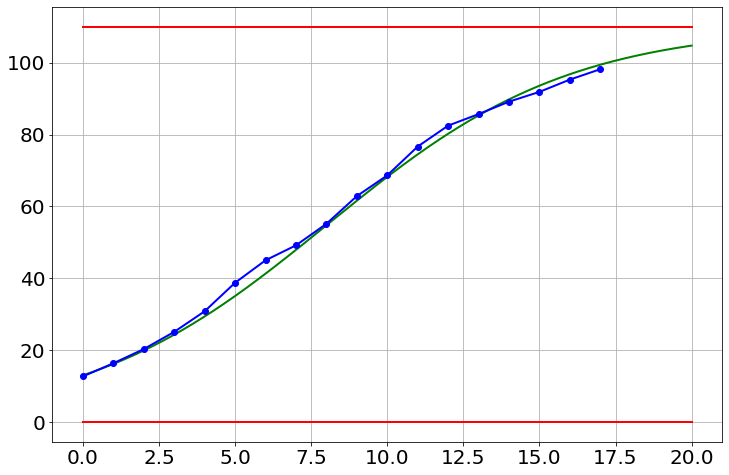

In [17]:
sim=Simulation()
sim.add("x' = a*x*(1-x/K)",13)
sim.params(a=.25,K=110)
sim.run(20)

plot(sim.t,sim.x,'g-')
plot(t,x,'bo-')

# plot the x=0 fixed point
sim=Simulation()
sim.add("x' = a*x*(1-x/K)",0)
sim.params(a=.25,K=110)
sim.run(20)
plot(sim.t,sim.x,'r-')


# plot the x=K fixed point
sim=Simulation()
sim.add("x' = a*x*(1-x/K)",110)
sim.params(a=.25,K=110)
sim.run(20)
plot(sim.t,sim.x,'r-')
